# Feedback & Regression

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
sns.set_theme(font_scale=2,palette='colorblind')

data_url = 'https://raw.githubusercontent.com/rhodyprog4ds/rhodyds/main/data/310_data_22-midsem.csv'

In [3]:
feedback_df_raw = pd.read_csv(data_url)

In [4]:
feedback_df_raw.head()

,How much do you think you've learned so far this semester?,How much of the material that's been taught do you feel you understand?,How do you think the achievements you've earned so far align with your understanding?,Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [How well I follow instructions],Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [What I understand about the material],Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [How much effort I put into assignments],How fair do you think the amount each of the following is reflected in the grading [How well I follow instructions],How fair do you think the amount each of the following is reflected in the grading [What I understand about the material],How fair do you think the amount each of the following is reflected in the grading [How much effort I put into assignments],Which of the following have you done to support your learning outside of class time?
0,4,4,I think they reflect my understanding well,Reflected perfectly in the grading,Reflected perfectly in the grading,Reflected perfectly in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,"read the notes online, experimenting with the ..."
1,5,4,I think they reflect my understanding well,Reflected perfectly in the grading,Reflected perfectly in the grading,Reflected perfectly in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,"read the notes online, experimenting with the ..."
2,3,3,I think they reflect my understanding well,Reflected moderately in the grading,Reflected moderately in the grading,Reflected moderately in the grading,Should be less reflected in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,"read the notes online, download and run the no..."
3,4,3,I think they reflect my understanding well,Reflected moderately in the grading,Reflected moderately in the grading,Reflected moderately in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,"read the notes online, reading the documentati..."
4,5,2,I think they reflect my understanding well,Reflected moderately in the grading,Reflected strongly in the grading,Reflected a little in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Should be reflected more in the grading,"read the notes online, experimenting with the ..."


In [5]:
feedback_df_raw.columns

Index(['How much do you think you've learned so far this semester?',
       'How much of the material that's been taught do you feel you understand?',
       'How do you think the achievements you've earned so far align with your understanding?',
       'Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [How well I follow instructions]',
       'Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [What I understand about the material]',
       'Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [How much effort I put into assignments]',
       'How fair do you think the amount each of the following is reflected in the grading [How well I follow instructions]',
       'How fair do you think the amount each of 

In [6]:
short_names = {"How much do you think you've learned so far this semester?":'learned',
    "How much of the material that's been taught do you feel you understand?":'understand',
    "How do you think the achievements you've earned so far align with your understanding?":'achievements',
    'Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [How well I follow instructions]':'grading_instructions',
    'Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [What I understand about the material]':'grading_understanding',
    'Rank the following as what you feel the grading (when you do/not earn achievements) so far actually reflects about your performance in the class [How much effort I put into assignments]':'grading_effort',
    'How fair do you think the amount each of the following is reflected in the grading [How well I follow instructions]':'fairness_instructions',
    'How fair do you think the amount each of the following is reflected in the grading [What I understand about the material]':'fairness_understanding',
    'How fair do you think the amount each of the following is reflected in the grading [How much effort I put into assignments]':'fairness_effort',
    'Which of the following have you done to support your learning outside of class time? ':'learning_activities'}

In [7]:
feedback_df_cols = feedback_df_raw.rename(columns=short_names)
feedback_df_cols.head(2)

,learned,understand,achievements,grading_instructions,grading_understanding,grading_effort,fairness_instructions,fairness_understanding,fairness_effort,learning_activities
0,4,4,I think they reflect my understanding well,Reflected perfectly in the grading,Reflected perfectly in the grading,Reflected perfectly in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,"read the notes online, experimenting with the ..."
1,5,4,I think they reflect my understanding well,Reflected perfectly in the grading,Reflected perfectly in the grading,Reflected perfectly in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,Is fairly reflected in the grading,"read the notes online, experimenting with the ..."


In [8]:
learning_lists = feedback_df_cols['learning_activities'].str.split(',')
learning_stacked = learning_lists.apply(pd.Series).stack()
learning_df = pd.get_dummies(learning_stacked).sum(level=0)
learning_df.head()

/tmp/ipykernel_2186/3116911913.py:3: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  learning_df = pd.get_dummies(learning_stacked).sum(level=0)


,attended Aiden's office hours,attended Dr. Brown's office hours,download and run the notes,experimenting with the code from class,reading blogs or tutorials I find on my own,reading the documentation or course text,tinkering with code to answer other aspects of the material that I'm curious about,update the notes I took during class time,watching videos that I find on my own,download and run the notes,read the notes online,update the notes I took during class time
0,0,0,0,1,1,0,0,0,1,0,1,0
1,0,0,0,1,0,1,1,0,0,0,1,0
2,0,1,1,1,0,0,0,1,0,0,1,0
3,1,1,0,0,0,1,1,0,0,0,1,0
4,1,0,0,1,1,1,0,0,1,0,1,0


In [9]:
learning_df.sum()

 attended Aiden's office hours                                                          7
 attended Dr. Brown's office hours                                                      4
 download and run the notes                                                             4
 experimenting with the code from class                                                11
 reading blogs or tutorials I find on my own                                            9
 reading the documentation or course text                                              11
 tinkering with code to answer other aspects of the material that I'm curious about     5
 update the notes I took during class time                                              4
 watching videos that I find on my own                                                  7
download and run the notes                                                              1
read the notes online                                                                  13
update the

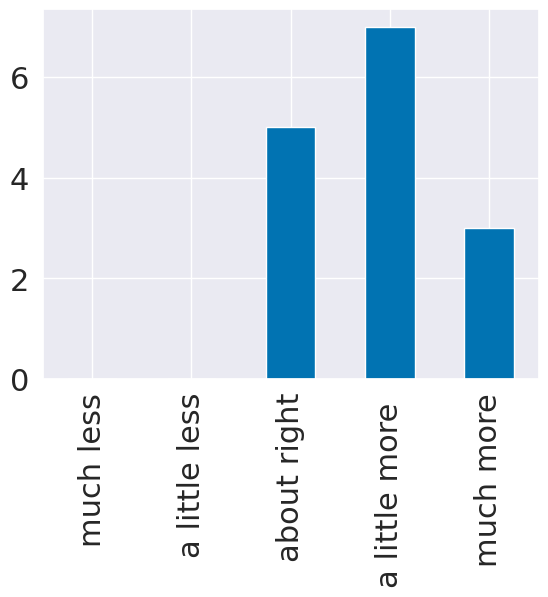

In [10]:
el_meaning = {1: 'much less',
 2: 'a little less',
 3: 'about right',
 4: 'a little more ',
 5: 'much more'}

question_text = list(short_names.keys())[list(short_names.values()).index('learned')]
el_counts,_ = np.histogram(feedback_df_cols['learned'],bins = [i+.5 for i in range(6)])
el_df = pd.DataFrame(data = el_counts,index = el_meaning.values(),columns= [question_text],)

# el_df.rename_axis(index='amount relative to expectations',inplace=True)
el_df.plot.bar(legend=False);
# sns.displot(feedback_df['learned'].replace(el_meaning))

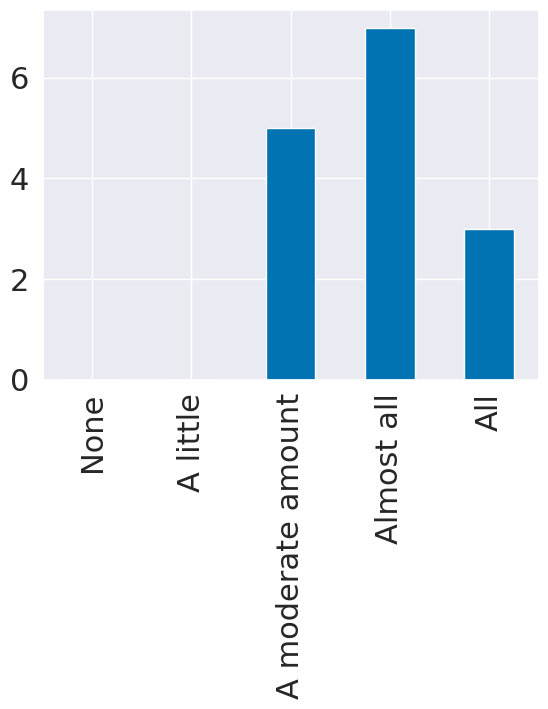

In [11]:
u_meaning = {0:'None', 1:'A little',3:'A moderate amount', 4:'Almost all',5:'All'}


question_text = list(short_names.keys())[list(short_names.values()).index('understand')]
u_counts,_ = np.histogram(feedback_df_cols['understand'],bins = [i+.5 for i in range(6)])
u_df = pd.DataFrame(data = el_counts,index = u_meaning.values(),columns= [question_text],)


u_df.plot.bar(legend=False);

In [12]:
tips_df = sns.load_dataset("tips")

In [13]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Split the data so that we use 80% of the data to train a modle to predict the tip from the total bill

In [14]:
tips_X = tips_df['total_bill'].values
tips_X = tips_X[:,np.newaxis] # add an axis
tips_y = tips_df['tip']

tips_X_train,tips_X_test, tips_y_train, tips_y_test = train_test_split(tips_X,tips_y,train_size=.8)

In [15]:
regr = linear_model.LinearRegression()

In [16]:
type(regr)

sklearn.linear_model._base.LinearRegression

In [17]:
tips_X.shape

(244, 1)

In [18]:
regr.fit(tips_X_train,tips_y_train)

LinearRegression()

In [19]:
tips_y_pred = regr.predict(tips_X_test)

In [20]:
type(tips_y_pred)

numpy.ndarray

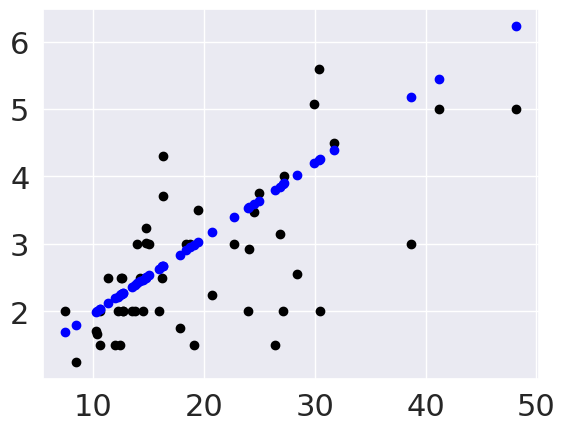

In [21]:
plt.scatter(tips_X_test,tips_y_test, color='black')
plt.scatter(tips_X_test,tips_y_pred, color='blue')

In [22]:
mean_squared_error(tips_y_test,tips_y_pred)

0.8462070392690184

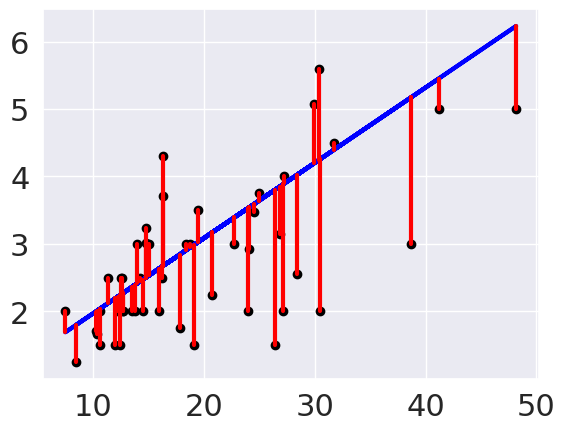

In [23]:
plt.scatter(tips_X_test, tips_y_test, color='black')
plt.plot(tips_X_test, tips_y_pred, color='blue', linewidth=3)

# draw vertical lines frome each data point to its predict value
[plt.plot([x,x],[yp,yt], color='red', linewidth=3)
         for x, yp, yt in zip(tips_X_test, tips_y_pred,tips_y_test)];

In [24]:
r2_score(tips_y_test, tips_y_pred)

0.24867673421015335

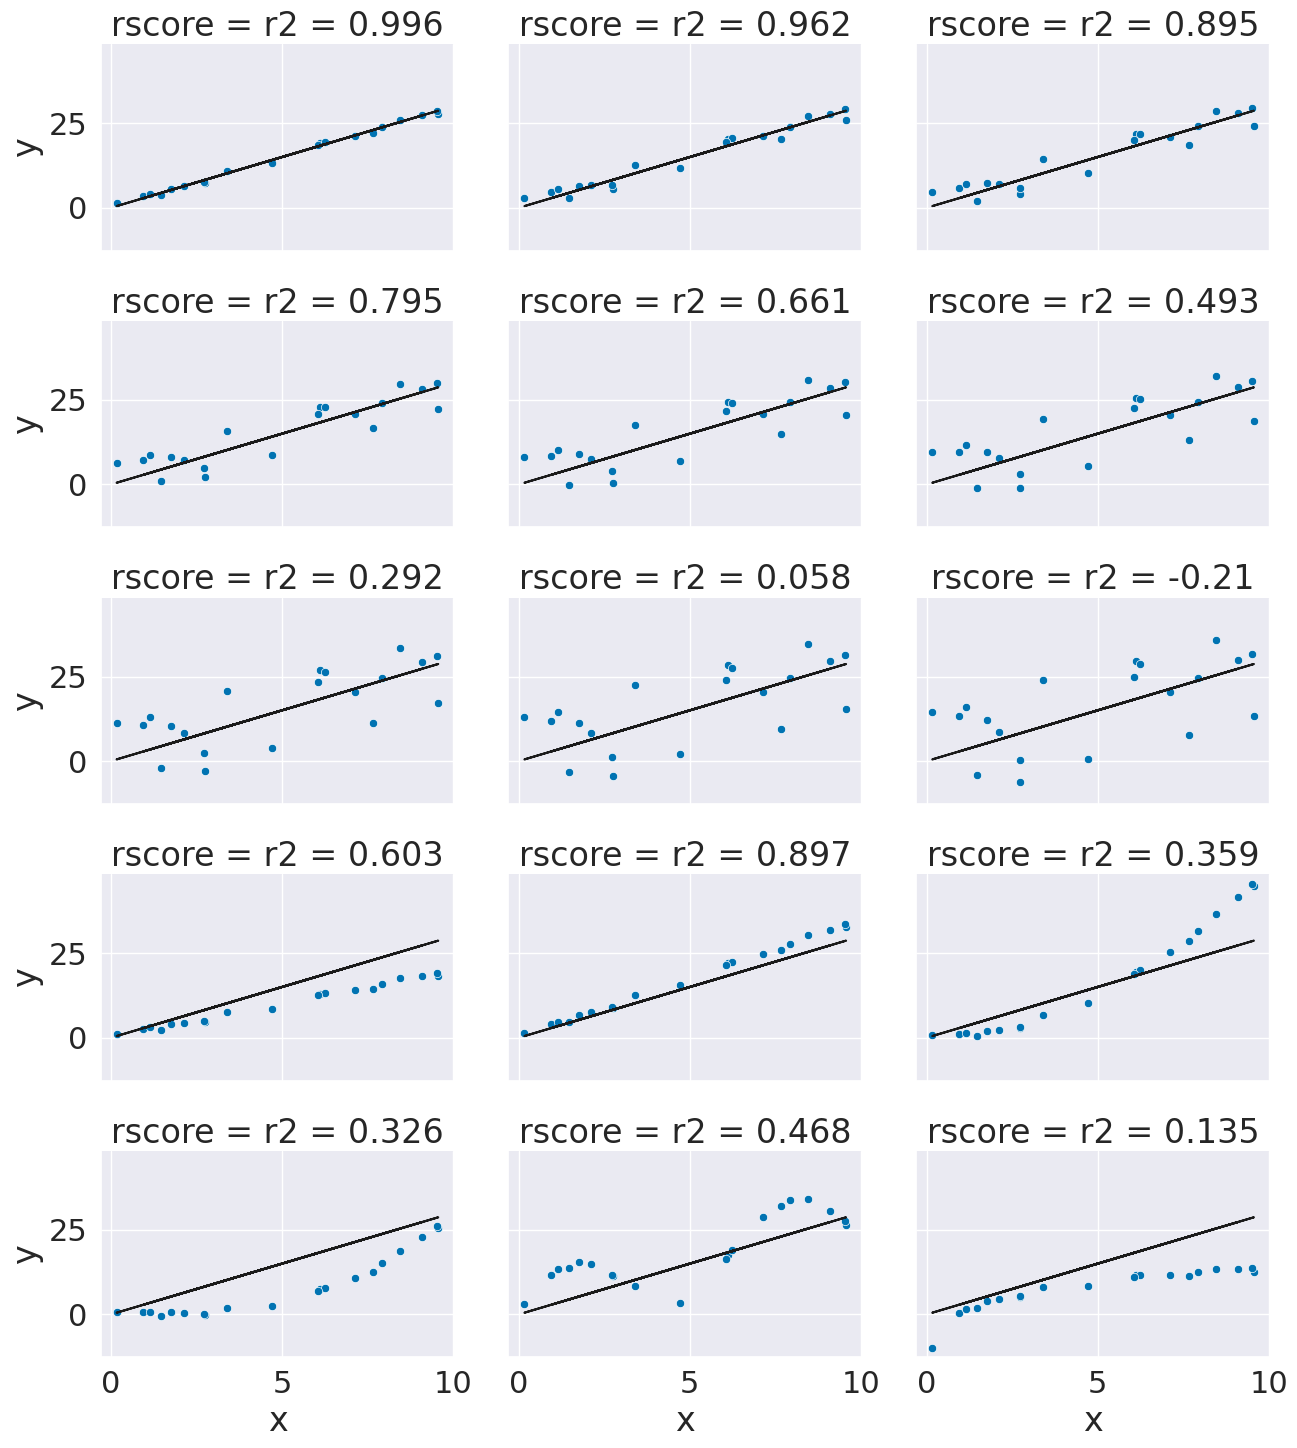

In [25]:
x = 10*np.random.random(20)
y_pred = 3*x
ex_df = pd.DataFrame(data = x,columns = ['x'])
ex_df['y_pred'] = y_pred
n_levels = range(1,18,2)
noise = (np.random.random(20)-.5)*2
for n in n_levels:
  y_true = y_pred + n* noise
  ex_df['r2 = '+ str(np.round(r2_score(y_pred,y_true),3))] = y_true

f_x_list = [2*x,3.5*x,.5*x**2, .03*x**3, 10*np.sin(x)+x*3,3*np.log(x**2)]
for fx in f_x_list:
  y_true = fx + noise
  ex_df['r2 = '+ str(np.round(r2_score(y_pred,y_true),3))] = y_true   

xy_df = ex_df.melt(id_vars=['x','y_pred'],var_name='rscore',value_name='y')
# sns.lmplot(x='x',y='y', data = xy_df,col='rscore',col_wrap=3,)
g = sns.FacetGrid(data = xy_df,col='rscore',col_wrap=3,aspect=1.5,height=3)
g.map(plt.plot, 'x','y_pred',color='k')
g.map(sns.scatterplot, "x", "y",)

In [26]:
regr.score(tips_X_test,tips_y_test)

0.24867673421015335